In [1]:
import os
import pandas as pd

data_path = "data/output2"

X = []
Y = []

fileNames = os.listdir(data_path)

tflite_model_name = "sleep_tracking_model"
c_model_name = "sleep_tracking_model"


for fileName in fileNames:
    if fileName.endswith(".csv"):
        filePath = os.path.join(data_path, fileName)
        fileName = fileName.split('.')[0][:2]
        if fileName == "AN":
            Y.append(1)
        elif fileName == "NM":
            Y.append(0)

        df = pd.read_csv(filePath)
        df = df.drop(labels="STT", axis=1)
        X.append(df.values)

print("Number of csv files read: ", len(X))
print("Number of csv files read: ", len(Y))
print(X)
print(Y)

Number of csv files read:  45
Number of csv files read:  45
[array([[ 9.4 ,  0.57,  4.45, -0.1 ,  0.05, -0.01],
       [ 9.39,  0.62,  4.5 , -0.1 ,  0.05, -0.02],
       [ 9.35,  0.61,  4.36, -0.11,  0.05, -0.01],
       ...,
       [ 9.39,  0.38,  4.4 , -0.12,  0.06, -0.01],
       [ 9.41,  0.38,  4.37, -0.12,  0.06, -0.01],
       [ 9.4 ,  0.38,  4.36, -0.12,  0.06, -0.01]]), array([[ 9.38,  0.37,  4.36, -0.1 ,  0.06, -0.02],
       [ 9.39,  0.37,  4.41, -0.12,  0.07, -0.01],
       [ 9.39,  0.41,  4.44, -0.11,  0.05, -0.  ],
       ...,
       [ 9.39,  0.25,  4.4 , -0.11,  0.05, -0.01],
       [ 9.39,  0.23,  4.42, -0.13,  0.05, -0.01],
       [ 9.39,  0.23,  4.42, -0.13,  0.04, -0.01]]), array([[ 9.27, -1.57,  4.38, -0.1 ,  0.06, -0.01],
       [ 9.25, -1.54,  4.4 , -0.11,  0.04, -0.02],
       [ 9.2 , -1.55,  4.35, -0.11,  0.06, -0.01],
       ...,
       [ 9.14, -1.52,  4.6 , -0.12,  0.05, -0.01],
       [ 9.15, -1.57,  4.65, -0.11,  0.05, -0.01],
       [ 9.14, -1.52,  4.64, -0.

In [71]:
from sklearn.model_selection import train_test_split
import numpy as np

X = np.array(X)
Y = np.array(Y)

xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y) 

print("Number of samples in training set:", xTrain.shape[0])
print("Number of samples in test set:", xTest.shape[0])

xTrain -= np.min(xTrain)
xTest -= np.min(xTest)

print("Min of train:", np.min(xTrain))
print("Min of test:", np.min(xTest))

print(xTrain[0].shape)



Number of samples in training set: 36
Number of samples in test set: 9
Min of train: 0.0
Min of test: 0.0
(2000, 6)
0.0


In [80]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, MaxPool1D, AveragePooling1D

inputShape = (2000, 6)
filters = 1
kernelSize = 6

model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv1D(filters = filters, kernel_size = kernelSize, input_shape=inputShape, activation="sigmoid"))
model.add(AveragePooling1D(pool_size=2))
model.add(tf.keras.layers.Conv1D(filters = filters, kernel_size = kernelSize, activation="sigmoid"))
model.add(AveragePooling1D(pool_size=2))
model.add(tf.keras.layers.Conv1D(filters = filters, kernel_size = kernelSize, activation="sigmoid"))

model.add(Flatten())
model.add(Dense(128, activation='sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()



Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_59 (Conv1D)          (None, 1996, 1)           31        
                                                                 
 average_pooling1d_51 (Aver  (None, 665, 1)            0         
 agePooling1D)                                                   
                                                                 
 conv1d_60 (Conv1D)          (None, 663, 1)            4         
                                                                 
 average_pooling1d_52 (Aver  (None, 221, 1)            0         
 agePooling1D)                                                   
                                                                 
 conv1d_61 (Conv1D)          (None, 219, 1)            4         
                                                                 
 flatten_19 (Flatten)        (None, 219)             

In [83]:
# Huấn luyện mô hình
history = model.fit(xTrain, yTrain, batch_size=32, epochs=1000, validation_data=(xTest, yTest))

# Đánh giá mô hình trên dữ liệu kiểm tra
loss, accuracy = model.evaluate(xTest, yTest)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/1000
2/2 [==============================] - 0s 102ms/step - loss: 0.6614 - accuracy: 0.6667 - val_loss: 0.6367 - val_accuracy: 0.6667
Epoch 2/1000
2/2 [==============================] - 0s 46ms/step - loss: 0.6670 - accuracy: 0.6667 - val_loss: 0.6368 - val_accuracy: 0.6667
Epoch 3/1000
2/2 [==============================] - 0s 57ms/step - loss: 0.6521 - accuracy: 0.6667 - val_loss: 0.6369 - val_accuracy: 0.6667
Epoch 4/1000
2/2 [==============================] - 0s 56ms/step - loss: 0.6259 - accuracy: 0.6667 - val_loss: 0.6368 - val_accuracy: 0.6667
Epoch 5/1000
2/2 [==============================] - 0s 49ms/step - loss: 0.6616 - accuracy: 0.6667 - val_loss: 0.6366 - val_accuracy: 0.6667
Epoch 6/1000
2/2 [==============================] - 0s 48ms/step - loss: 0.6629 - accuracy: 0.6667 - val_loss: 0.6365 - val_accuracy: 0.6667
Epoch 7/1000
2/2 [==============================] - 0s 49ms/step - loss: 0.6194 - accuracy: 0.6667 - val_loss: 0.6368 - val_accuracy: 0.6667
Epoch 8/1000

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


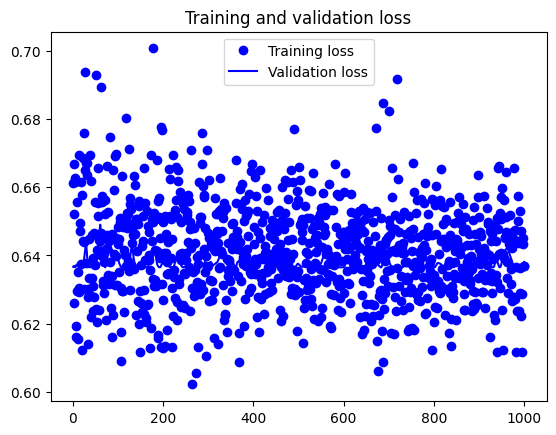

In [84]:
import matplotlib.pyplot as plt

print(history.history.keys())

# Plot the training history
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

1/1 [==============================] - 0s 119ms/step
[[0.36019167]
 [0.36019167]
 [0.36019164]
 [0.36019164]
 [0.36019164]
 [0.36019164]
 [0.36019164]
 [0.36019164]
 [0.36019164]]
[0 0 0 0 1 1 1 0 0]


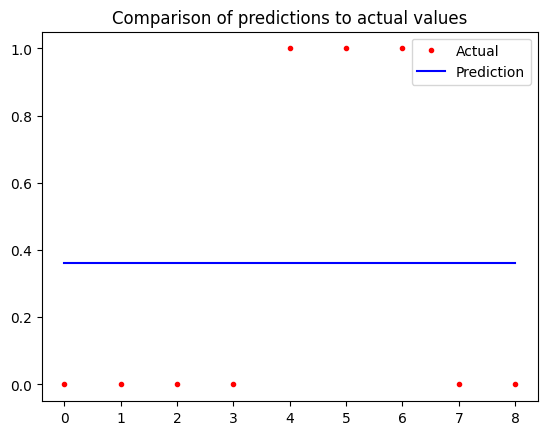

In [85]:
# Plot predictions against actual values
predictions = model.predict(xTest)

xLabel = range(len(xTest))

print(predictions)
print(yTest)

plt.clf()
plt.title("Comparison of predictions to actual values")
plt.plot(xLabel, yTest, 'r.', label='Actual')
plt.plot(xLabel, predictions, 'b', label='Prediction')
plt.legend()
plt.show()

In [95]:
# Convert Keras model to a tflite model
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
tflite_model = converter.convert()

open(tflite_model_name + '.tflite', 'wb').write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\ducma\AppData\Local\Temp\tmpvcix70am\assets


INFO:tensorflow:Assets written to: C:\Users\ducma\AppData\Local\Temp\tmpvcix70am\assets


40992

In [96]:
# Function: Convert some hex value into an array for C programming
def hex_to_c_array(hex_data, var_name):

  c_str = ''

  # Create header guard
  c_str += '#ifndef ' + var_name.upper() + '_H\n'
  c_str += '#define ' + var_name.upper() + '_H\n\n'

  # Add array length at top of file
  c_str += '\nunsigned int ' + var_name + '_len = ' + str(len(hex_data)) + ';\n'

  # Declare C variable
  c_str += 'unsigned char ' + var_name + '[] = {'
  hex_array = []
  for i, val in enumerate(hex_data) :

    # Construct string from hex
    hex_str = format(val, '#04x')

    # Add formatting so each line stays within 80 characters
    if (i + 1) < len(hex_data):
      hex_str += ','
    if (i + 1) % 12 == 0:
      hex_str += '\n '
    hex_array.append(hex_str)

  # Add closing brace
  c_str += '\n ' + format(' '.join(hex_array)) + '\n};\n\n'

  # Close out header guard
  c_str += '#endif //' + var_name.upper() + '_H'

  return c_str

In [97]:
# Write TFLite model to a C source (or header) file
with open(c_model_name + '.h', 'w') as file:
  file.write(hex_to_c_array(tflite_model, c_model_name))